# Data Analysis and Visualization of Credit Card Customers

In this work, Credit Card Customers data will be analyzed according to customers attirubutes. This work contain includes;

1. Describing of Data
1. Understanding the Data
1. Preparing of Data
1. Analysis and Visualization of the data with plotly library
1. Conclusion


## Lets start import the libraries that will use in this project. 

* Pandas will be used the create a dataframe.
* Numpy will be used for the arithmetic calculations if it is necessary
* Plotly and seaborn libraries will be used for the visualization.
* Math and matplotlib also will be used in this analysis

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sea
import math
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/credit-card-customers/BankChurners.csv


#  **1. Describing of Data**

In [2]:
# Data is reading helping with the Pandas libray in this stage.
df = pd.read_csv('../input/credit-card-customers/BankChurners.csv')

# Unneccesary columns are dropped from the dataframe
df.drop(columns = [df.columns[len(df.columns) - 1], df.columns[len(df.columns) - 2]], inplace = True)

# To quick check of the data we can use the .head() function to see first 10 rows.

df.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


#  **2. Understanding the Data**

#### Which columns will be used during the analysis?

1. Attrition_Flag
1. Customer_Age
1. Gender
1. Dependent_Count
1. Marial_Status
1. Income_Category
1. Card_Category
1. Credit_Limit

In [3]:
# To check the datatypes of columns, as we can see, data has not any null-value.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [4]:
# Before the start the analysis, we can check the all unique values of columns. It can be helped us to visualize data as much as easily.
df.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [5]:
# Statistical values of numerical columns can be check here. This way we can figure out the outliers according to statictical values.
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [6]:
# Correlation between the numerical columns can be seen below.
df.corr().T

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,1.000000,0.007613,0.006772,0.134588,0.006907,0.005729,0.005694,0.005708,0.000825,0.005633,0.017369,-0.019692,-0.002961,0.007696,0.000266
Customer_Age,0.007613,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Dependent_count,0.006772,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Months_on_book,0.134588,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Total_Relationship_Count,0.006907,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663
Months_Inactive_12_mon,0.005729,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503
Contacts_Count_12_mon,0.005694,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471
Credit_Limit,0.005708,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965
Total_Revolving_Bal,0.000825,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022
Avg_Open_To_Buy,0.005633,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808


#  **3. Preparing of Data**

In [7]:
# Double check for the null-values
df.isnull().sum()

# As we can see, all variables have not null values. 

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [8]:
# Lets change the Income Category to be useful for this analysis.

df['Income_Category'] = df['Income_Category'].replace(['$60K - $80K','Less than $40K','$80K - $120K','$40K - $60K','$120K +','Unknown'],[3,1,4,2,5,0])

# We do not need to unique "Clientnum" column for this analysis stage.
df = df.drop(["CLIENTNUM"], axis =1)

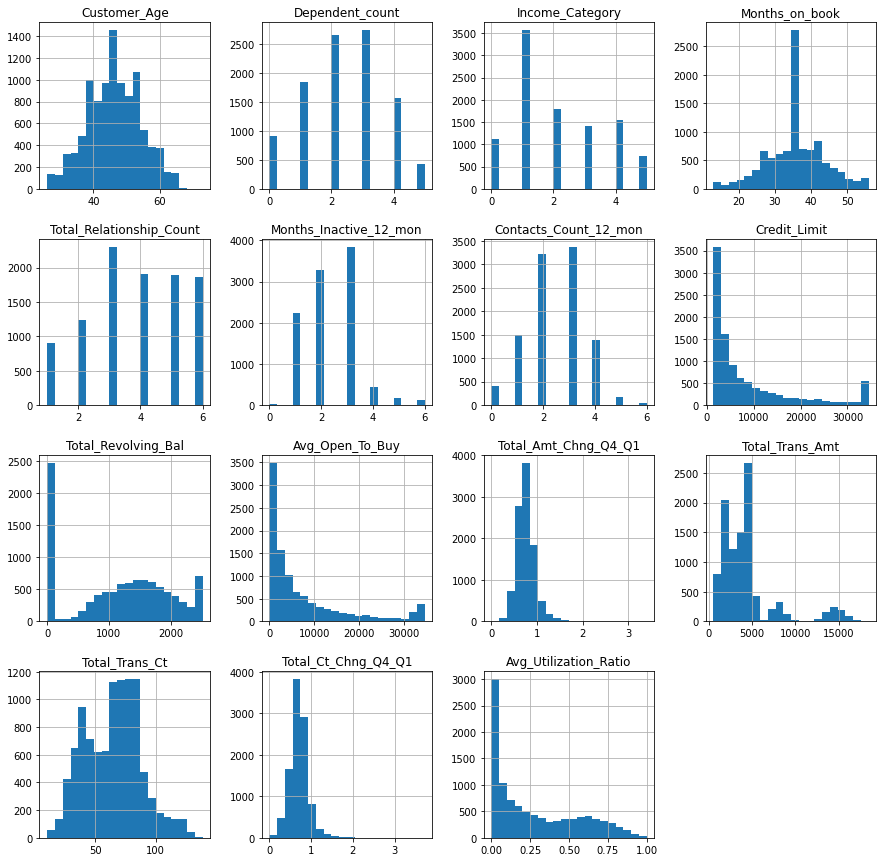

In [9]:
# Lets see the general distrubition of the numerical variables

axList = df.hist(bins=20, figsize = (15, 15))
plt.savefig("Hist.png")

#  **4. Analysis and Visualization of the Data**

In [10]:
# Lets check the customer age distribution with the Gender
fig = px.histogram(df, x="Customer_Age", title = "Customer Age Distribution",color="Gender")
fig.update_layout(bargap=0.2)
fig.show()

In [11]:
# In this part, we can see the Male-Famela percent.

# Creating a list to find out Gender - Total 

gender_list = ["Male", df['Gender'].value_counts()["M"]], ["Female", df['Gender'].value_counts()["F"]]
gender_list

# Converting from list to dataframe for visualization with plotly pie chart
df_gender = pd.DataFrame(gender_list, columns=["Gender", "Total"])
df_gender

colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = px.pie(df_gender, values='Total', names='Gender', title = "Customer Gender Distribution", color_discrete_sequence=px.colors.sequential.RdBu_r)
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

In [12]:
# In this part, we can see the Male-Female percent.

# Creating a list to find out Card Category - Total 

card_list = ["Blue", df['Card_Category'].value_counts()["Blue"]], ["Silver", df['Card_Category'].value_counts()["Silver"]], ["Gold", df['Card_Category'].value_counts()["Gold"]], ["Platinum", df['Card_Category'].value_counts()["Platinum"]]
card_list

# Converting from list to dataframe for visualization with plotly pie chart
df_card = pd.DataFrame(card_list, columns=["Card_Category", "Total"])
df_card

colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = px.pie(df_card, values='Total', names='Card_Category', title = "Total Card Category Distribution", color_discrete_sequence=px.colors.sequential.RdBu_r)
fig.update_traces(marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()


In [13]:
# Lets check the customer age distribution with the Gender
fig = px.histogram(df, x="Income_Category", title = "Customer Age Distribution",color="Gender")
fig.update_layout(bargap=0.2)
fig.show()

In [14]:
# Also both gender and card category distribution can be shown helping with "plotly go"

fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'},{'type':'domain'}]])
fig.add_trace(go.Pie(labels=df_card["Card_Category"], values=df_card["Total"],customdata=df_card["Card_Category"], textinfo='label+percent',insidetextorientation='horizontal', textfont=dict(color='#000000'), marker_colors=px.colors.qualitative.Plotly),
              1, 1)
fig.add_trace(go.Pie(labels=df_gender["Gender"], values=df_gender["Total"], customdata=df_gender["Gender"], textinfo='label+percent',insidetextorientation='horizontal', textfont=dict(color='#000000'), marker_colors=px.colors.qualitative.Plotly),
              1, 2)
fig.add_trace(go.Pie(labels=df_gender["Gender"], values=df_gender["Total"], customdata=df_gender["Gender"], textinfo='label+percent',insidetextorientation='horizontal', textfont=dict(color='#000000'), marker_colors=px.colors.qualitative.Plotly),
              1, 2)


fig.update_traces(hole=.4, hoverinfo='label+percent', hovertemplate="<b>%{label}</b><br>Percent: %{percent}<br>Total: %{customdata}<extra></extra>")
fig.update_layout(
    showlegend=False,
    uniformtext_minsize=14, 
    uniformtext_mode='hide',

    annotations=[dict(text='Card Category', x=0.16, y=-0.2, font_size=20, showarrow=False, font=dict(color="black")),
                 dict(text='Gender', x=0.82, y=-0.2, font_size=20, showarrow=False,font=dict(color="black"))])
fig.show()

In [15]:
"""
Reminder: Income Category was converted from string to integer for analysis part.

Unknown - 0
Less than $40K - 1
$40K-60K - 2
$60-80K - 3
$80-120K - 4
More than $120K - 5

"""
# In this chart, we can see the total Credit Limit according to Education Level&Income Category
fig = px.histogram(df, x="Education_Level", y="Credit_Limit", color="Income_Category")
fig.show()

In [16]:
# In this chart, we can see the total Credit Limit according to Gender&MarialStatus
# Total Female customer is more than the Male Customer, but Male is more Credit Limit than Female Customer

fig = px.histogram(df, x="Gender", y="Credit_Limit", color="Marital_Status")
fig.show()

In [17]:
# Creating a list to find out Customer Type - Total 

customer_type = ["Existing Customer", df['Attrition_Flag'].value_counts()["Existing Customer"]], ["Attrited Customer", df['Attrition_Flag'].value_counts()["Attrited Customer"]]
customer_type

# Converting from list to dataframe for visualization with plotly pie chart
df_customer = pd.DataFrame(customer_type, columns=["Customer", "Total"])
df_customer

colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = px.pie(df_customer, values='Total', names='Customer', title = "Customer Type Distribution", color_discrete_sequence=px.colors.sequential.RdBu_r)
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

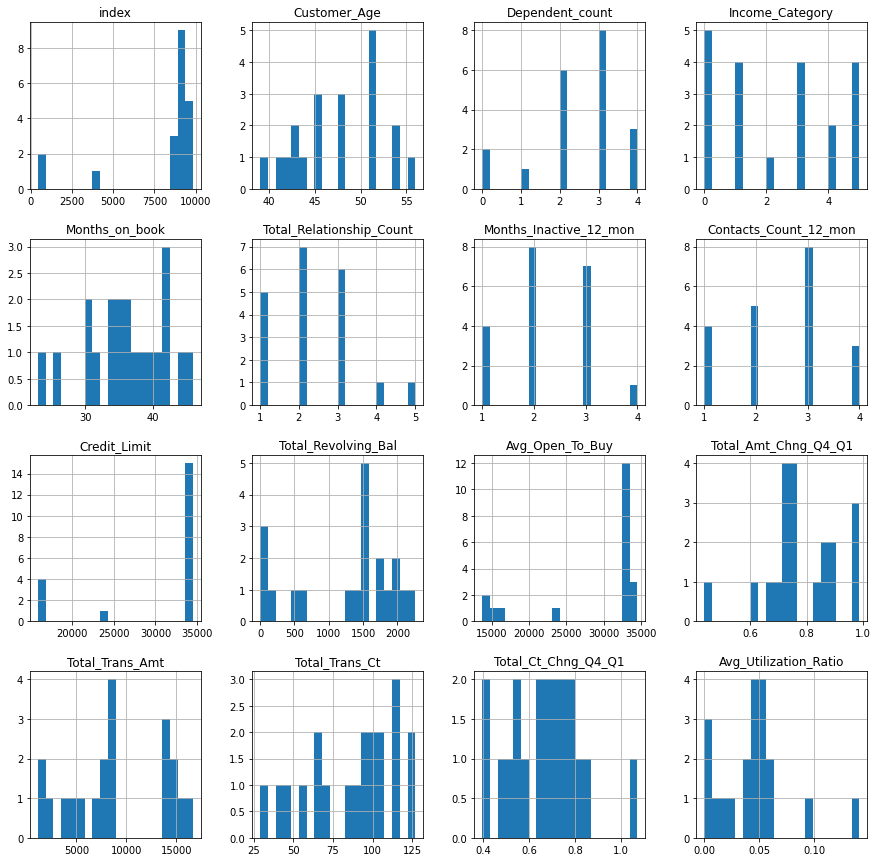

In [18]:
# Lets check the specific analysis for Platinum card users. We know, Platinum card users is the most lower users for this data.

df_plat=df.query("Card_Category == 'Platinum'")

df_plat.reset_index(inplace=True)

axList = df_plat.hist(bins=20, figsize = (15, 15))
plt.savefig("Hist.png")

In [19]:
# Education Level and Total Sum of Months Book with Income Category

fig = px.histogram(df_plat, x="Education_Level", y="Months_on_book", color="Income_Category")
fig.show()

In [20]:
# Lets check the customer age distribution with the Gender
fig = px.histogram(df_plat, x="Customer_Age", title = "Customer Age Distribution",color="Gender")
fig.update_layout(bargap=0.2)
fig.show()

In [21]:
# Creating a list to find out Customer Type - Total for Platinum

customer_type_plat = ["Existing Customer", df_plat['Attrition_Flag'].value_counts()["Existing Customer"]], ["Attrited Customer", df_plat['Attrition_Flag'].value_counts()["Attrited Customer"]]
customer_type_plat

# Converting from list to dataframe for visualization with plotly pie chart
df_customer_plat = pd.DataFrame(customer_type_plat, columns=["Customer", "Total"])
df_customer_plat

colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = px.pie(df_customer_plat, values='Total', names='Customer', title = "Customer Type Distribution", color_discrete_sequence=px.colors.sequential.RdBu_r)
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

In [22]:
# Lets check the customer age distribution with the Gender
fig = px.histogram(df_plat, x="Income_Category", title = "Income Category Distribution",color="Gender")
fig.update_layout(bargap=0.5)
fig.show()

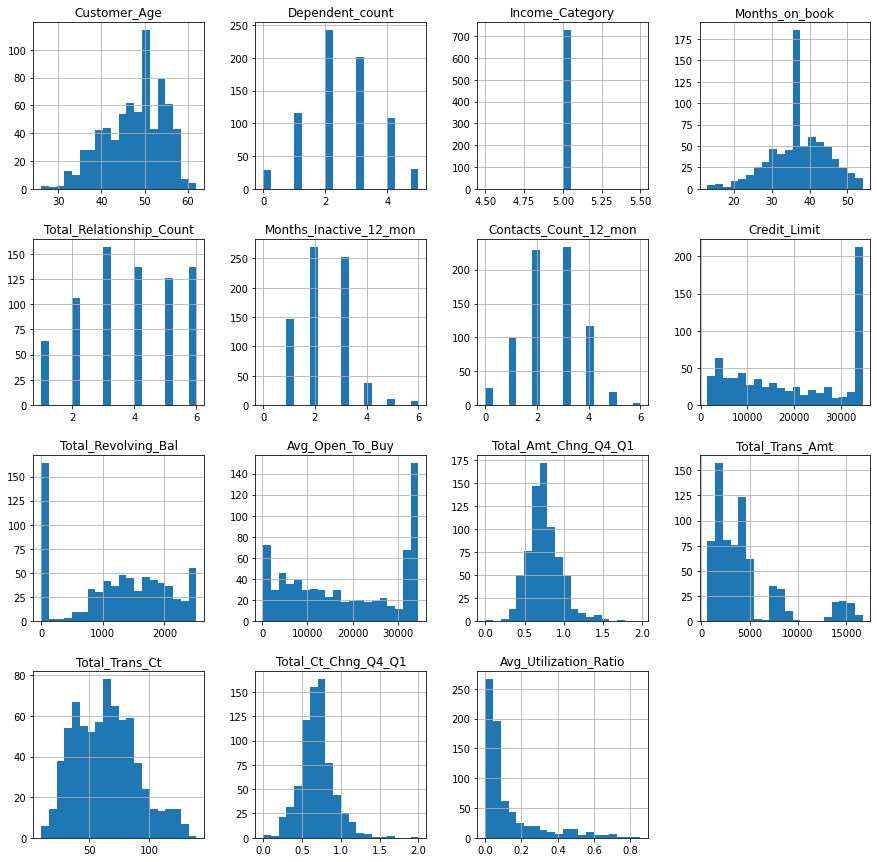

In [23]:
df_income_cat=df.query("Income_Category == 5")
axList = df_income_cat.hist(bins=20, figsize = (15, 15))
plt.savefig("Hist.png")

In [24]:
# Education Level and Total Sum of Months Book with Card Category

fig = px.histogram(df_income_cat, x="Education_Level", y="Months_on_book", color="Card_Category")
fig.show()

In [25]:
# Lets check the customer age distribution with the Gender
fig = px.histogram(df_income_cat, x="Customer_Age", title = "Customer Age Distribution",color="Gender")
fig.update_layout(bargap=0.2)
fig.show()

In [26]:
# Lets check the customer age distribution with the Gender
fig = px.histogram(df_income_cat, x="Card_Category", title = "Income Category Distribution",color="Gender")
fig.update_layout(bargap=0.5)
fig.show()

#  **5. Conclusion**

In this work, Card Customer Dataset prensents the general behaviour and catogorized of the customers. This way I decided to analyze the general and valuable parts of the data. Data analysis shown that;

1. Gender distribution of the customers are almost same percent.
1. General customer age is between 40-55 and the average age is 46. Middle age people is the most customer of this bank. This way, the bank offer special campaing for these customers.
1. If we check the card category, we can see the general customers are using Blue card. Its mean, most of them uses the basic card. How can the bank increases the other card categories according to the customers Income? We can find out it.
1. General education level is around the "Graduate" thats mean most of customer can know fundamental of the economics.
1. Credit limits of the Male is higher than the Female customers. Thats mean, Male are using the credit card than the Female. Why?
1. Also, the highest income category is just occured by Male customers. Thats mean, Male customer can know most of thing about the investing or something like that. How can get Female customers to this part? With a quick trainings about the investing? Maybe.
1. Last one is only the middle age people are using the Platinum card. Maybe some basic changes can get the other age ranges to the Bank.

This work also can be found on the at the following github adress: 